 Prepare the general libraries.

In [1]:
# libraries
library(community)
library(ggplot2)
library(ggrepel)
library(gridExtra) 

Warning message:
“package ‘gridExtra’ was built under R version 4.1.3”


 Prepare the path.

In [2]:
# the path to the counts, cell annotation and sample annation file. In this case its our working dir same as
# the notebook
path_in <- 'computed_results/'

print("path_in")
print(path_in)

[1] "path_in"
[1] "computed_results/"


Load data.

In [3]:
suppressWarnings(load(paste0(path_in,"/interactions.RData")))

Load functions for visualization.

In [4]:
data("visualization_functions")

In [24]:
ordered_IDs <- order_IDs_by_interaction_categories(interactions)

In [6]:
component_lim <- find_component_limits(interactions, ordered_IDs)

print(str(component_lim))

List of 14
 $ log2FC_w_min    : num -16.2
 $ log2FC_w_max    : num 15.4
 $ log2FC_rho_s_min: num -1.37
 $ log2FC_rho_s_max: num 2.18
 $ log2FC_phi_s_min: num -6.44
 $ log2FC_phi_s_max: num 5.69
 $ log2FC_p_s_min  : num -4.22
 $ log2FC_p_s_max  : num 1.1
 $ log2FC_rho_r_min: num -1.37
 $ log2FC_rho_r_max: num 2.18
 $ log2FC_phi_r_min: num -6.5
 $ log2FC_phi_r_max: num 5.65
 $ log2FC_p_r_min  : num -2.29
 $ log2FC_p_r_max  : num 1.14
NULL


In [7]:
forestplot_for_category <- function(IDs){
    # revert
    IDs <- IDs[length(IDs):1]

    
    rownames(interactions$anno_interactions) <- interactions$anno_interactions$interaction_ID
    my_anno_interactions <- interactions$anno_interactions[IDs,]
    my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID
                                                 ,ordered = TRUE
                                                        )
    
    print(paste(nrow(my_anno_interactions), "interactions in this category"))
    
    plot_all_forests(my_idx = rep(TRUE,nrow(my_anno_interactions))
                     ,my_anno_interactions = my_anno_interactions
                     ,keep_order = TRUE
                     ,threshold = 1
                     ,legend_title_size = 0
                     ,legend_text_size = 20
                     ,component_lim = component_lim
                    )
}

In [8]:
unique(interactions$anno_interactions$sign)

[1]    NA FALSE  TRUE

In [9]:
threshold_log2FC <- interactions$thresholds$threshold_log2FC

In [10]:
idx_up <- interactions$anno_interactions$log2FC_weights > threshold_log2FC
idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign

In [11]:
IDs_upregulated_all <- interactions$anno_interactions[idx_up,]$interaction_ID

In [12]:
length(IDs_upregulated_all)

[1] 25123

In [13]:
IDs_upregulated_sign <- interactions$anno_interactions[idx_up & idx_sign,]$interaction_ID

In [14]:
length(IDs_upregulated_sign)

[1] 109

[1] "25123 interactions in this category"


Warning message:
“Removed 475 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 98 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1222 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 135 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1026 rows containing missing values (`geom_bar()`).”


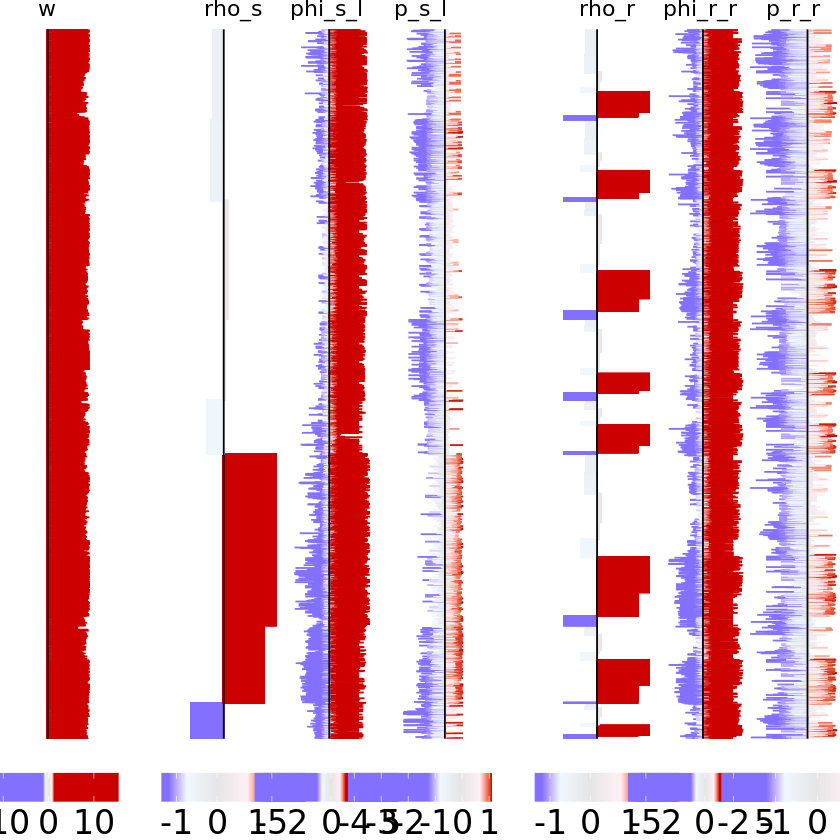

In [15]:
forestplot_for_category(IDs_upregulated_all)

[1] "109 interactions in this category"


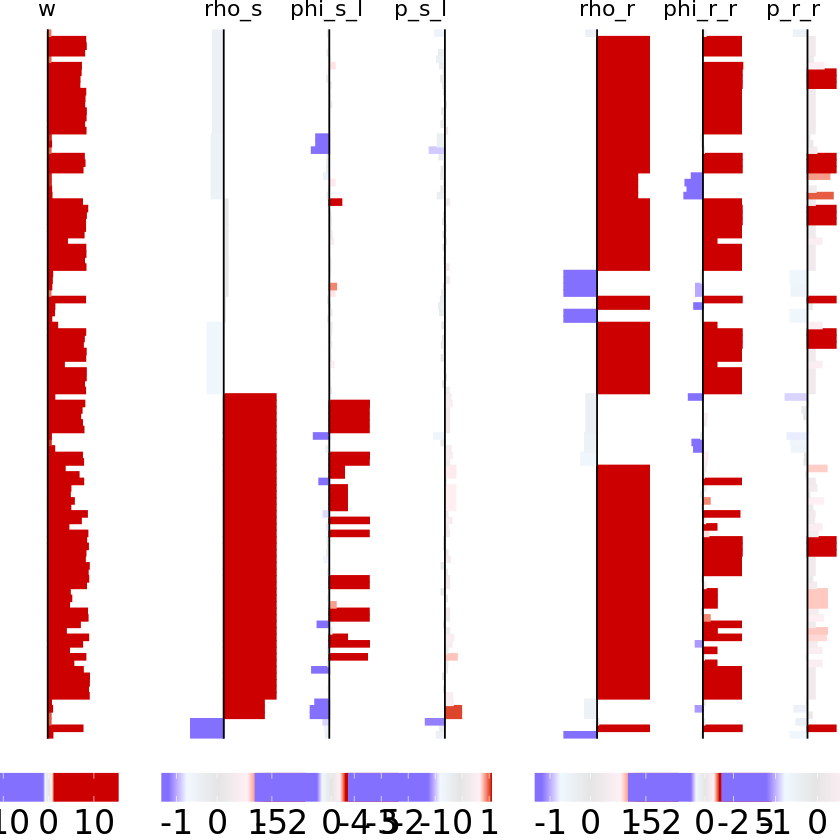

In [16]:
forestplot_for_category(IDs_upregulated_sign)

In [17]:
cell_types <- unique(interactions$anno_interactions$sending_cell_type)

In [18]:
length(cell_types)

[1] 8

In [19]:
IDs_upregulated_sign[15]

[1] "Mono:UBB_HSPC:TLR4"

[1] "Mono"
[1] "16 interactions in this category"
[1] "Gran"
[1] "10 interactions in this category"


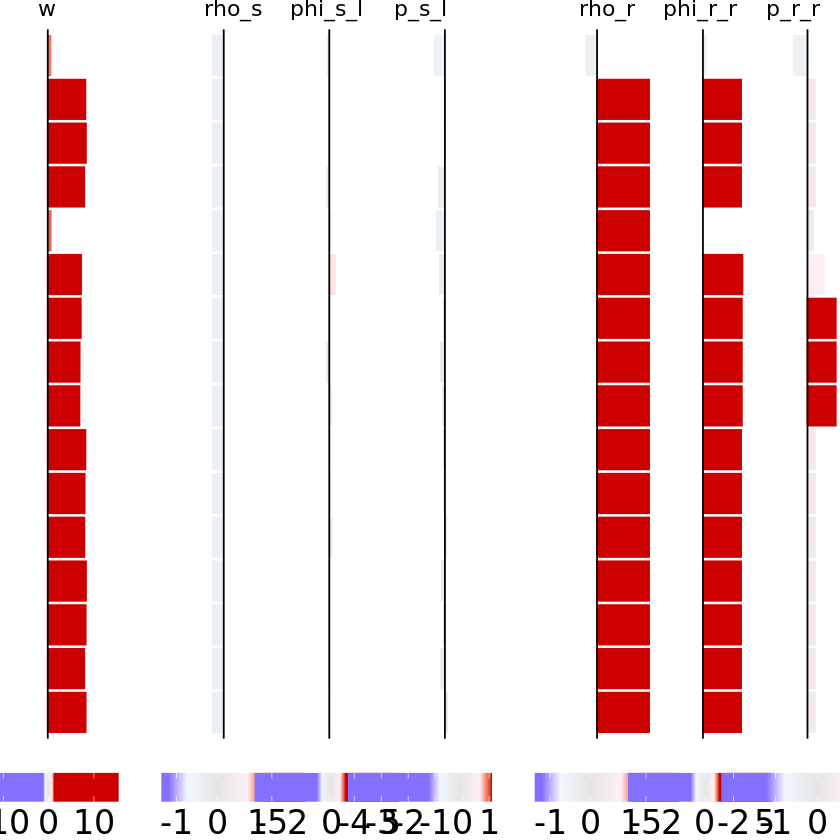

[1] "T"
[1] "15 interactions in this category"


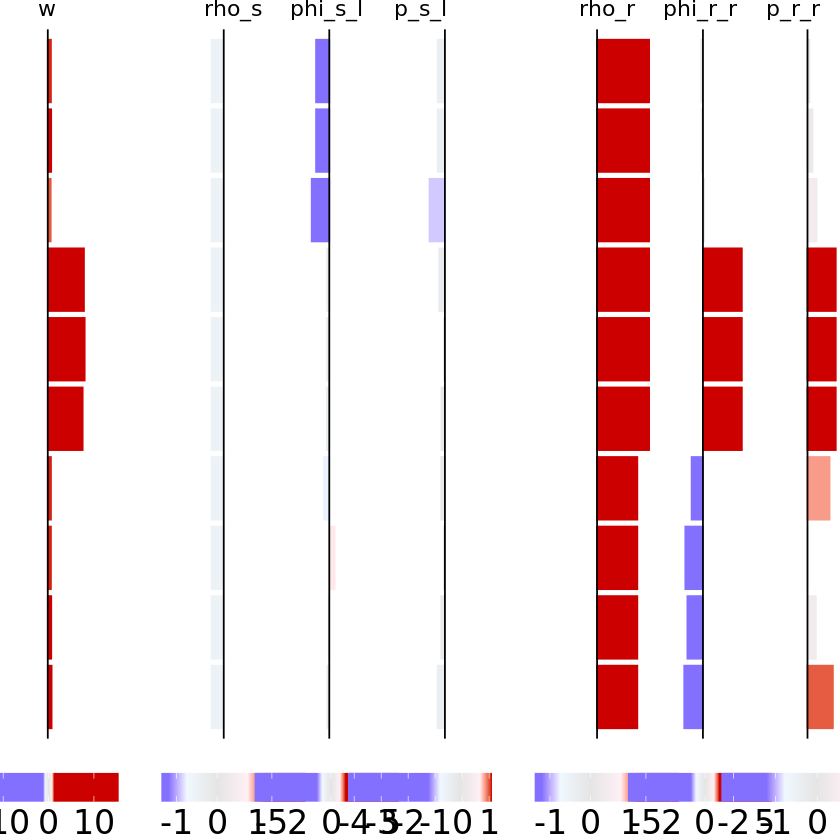

[1] "NK"
[1] "4 interactions in this category"


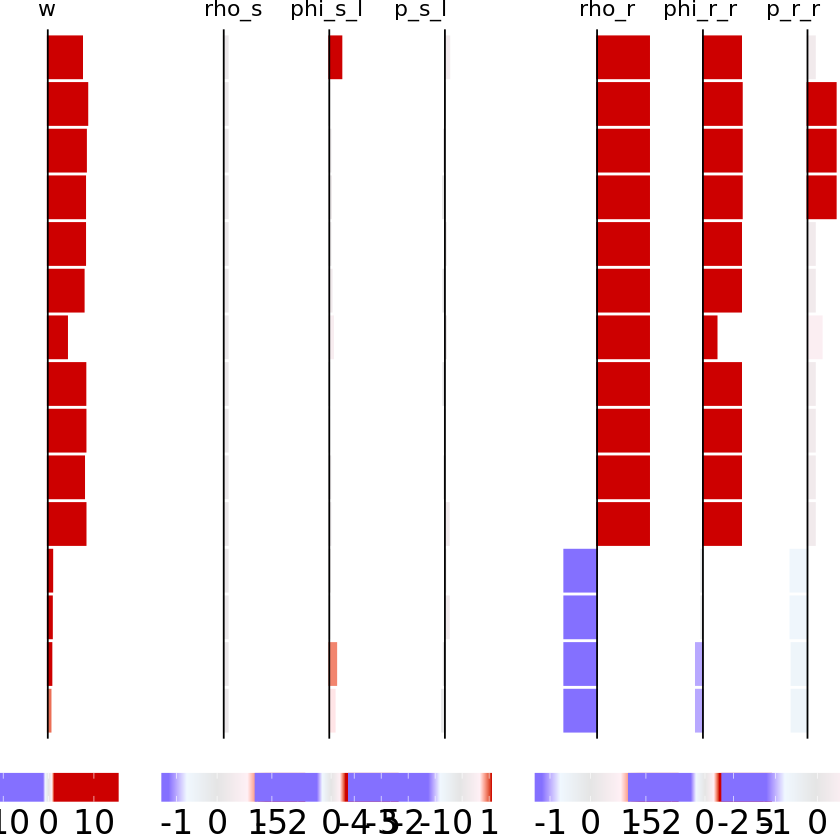

[1] "B"
[1] "11 interactions in this category"


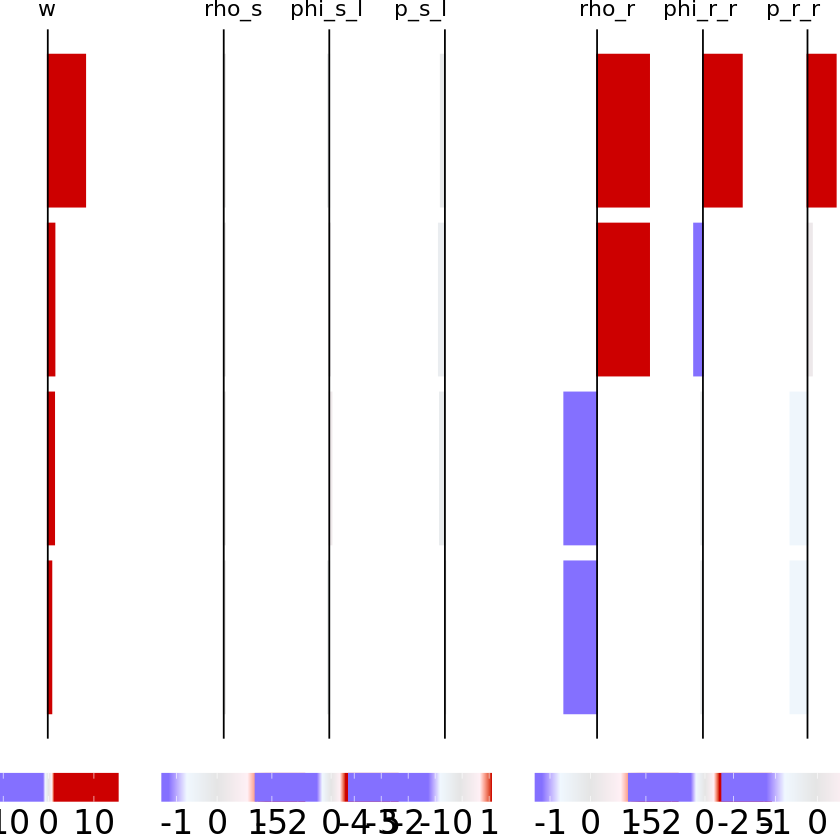

[1] "HSPC"
[1] "47 interactions in this category"


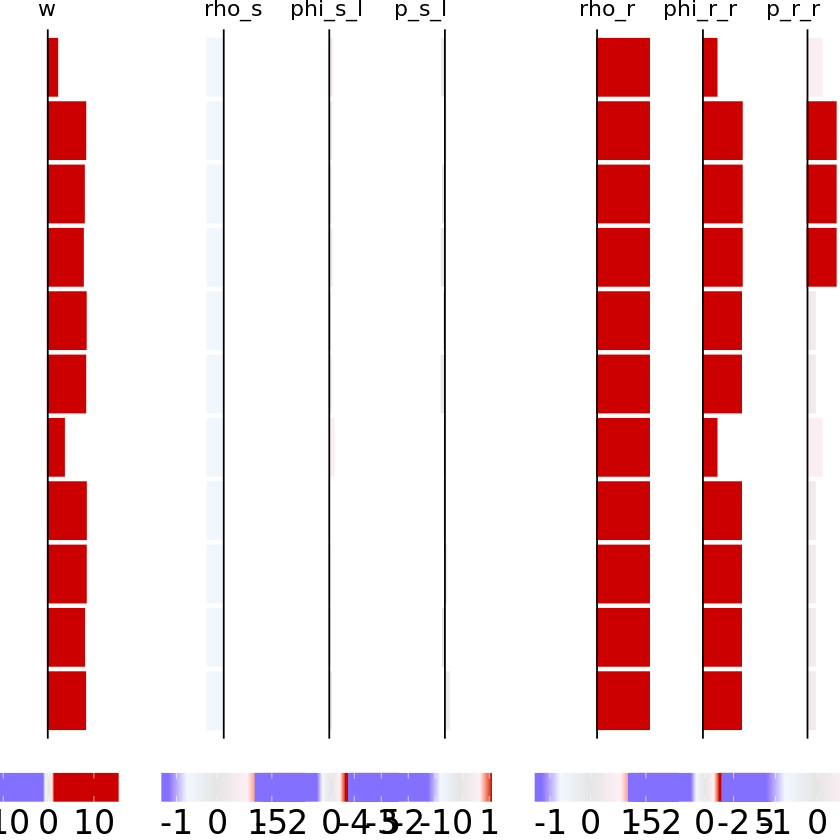

[1] "Ery"
[1] "3 interactions in this category"


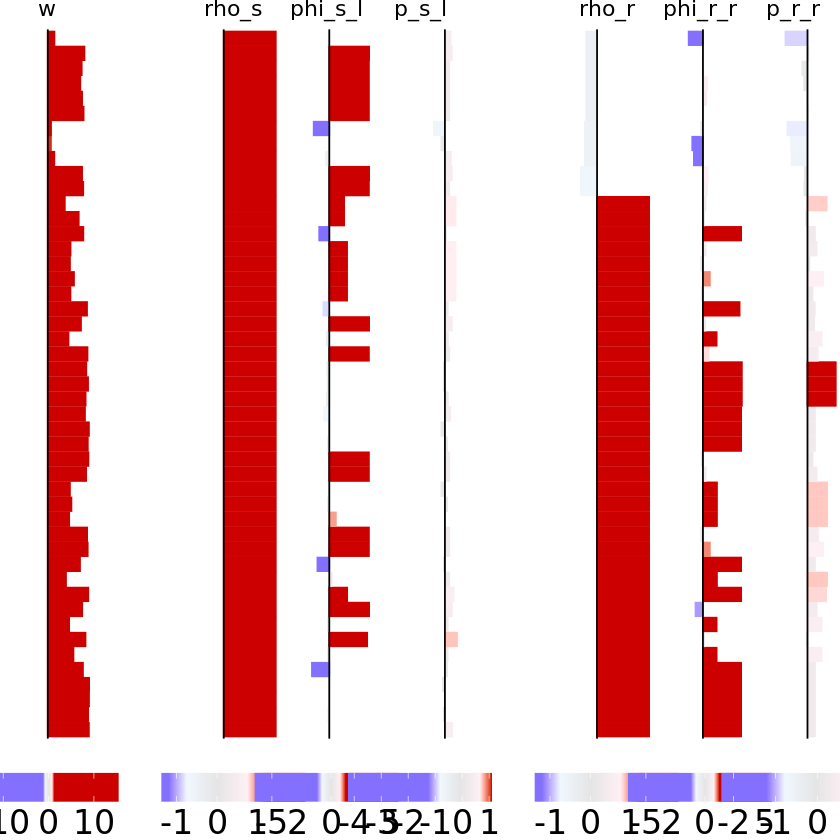

[1] "DC"
[1] "3 interactions in this category"


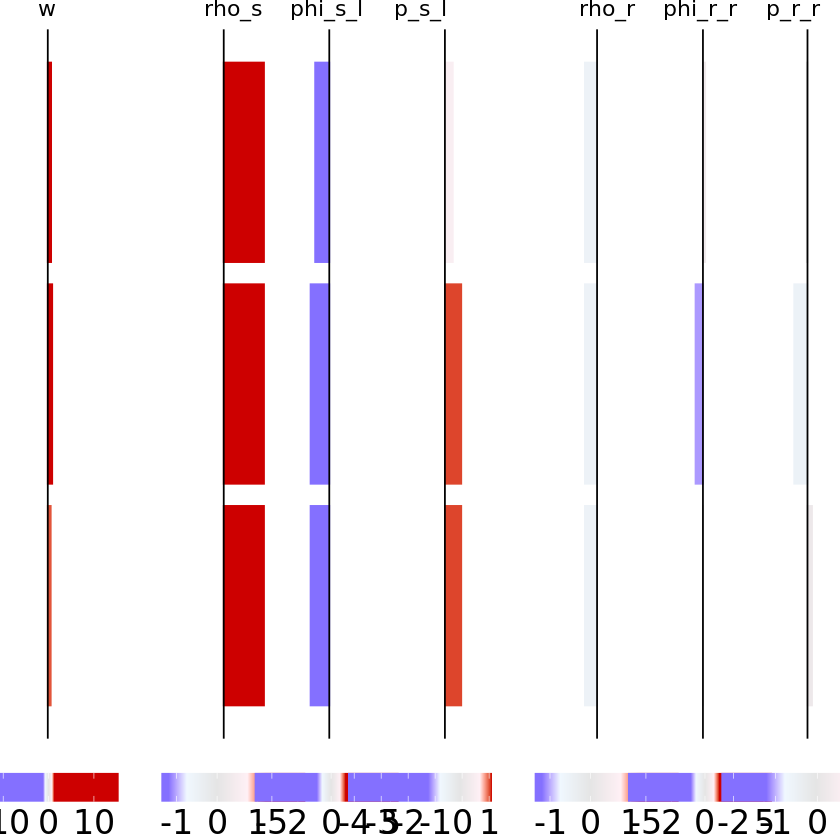

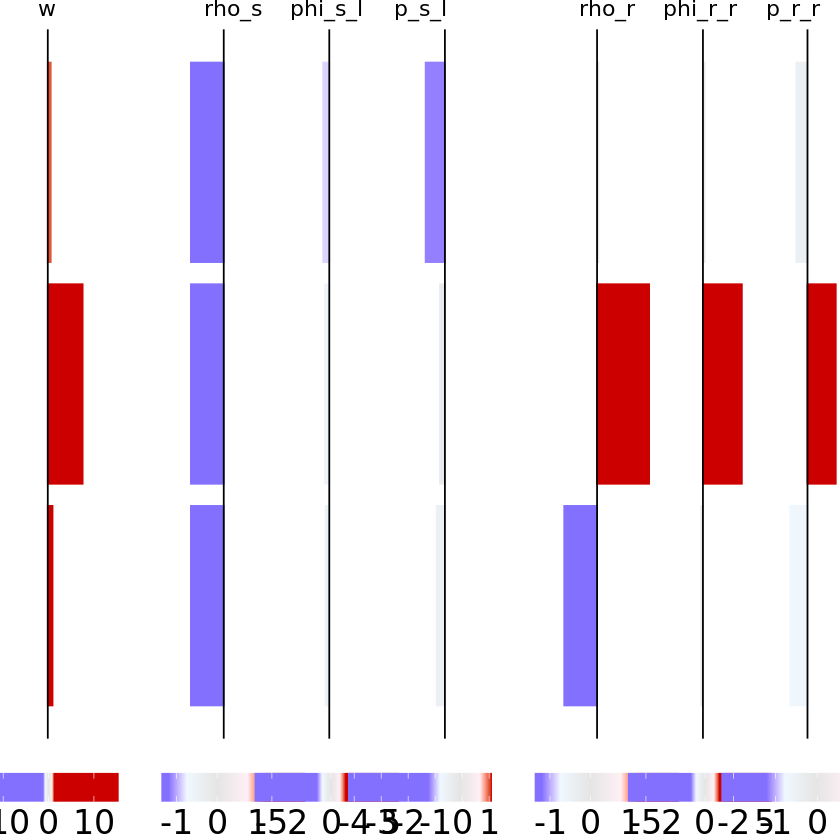

In [20]:
# sending cell types
for (cell_type in cell_types){
    print(cell_type)
    pattern <- paste0("^", cell_type, ":")
    filtered_IDs <- grep(pattern, IDs_upregulated_sign, value = TRUE)


    forestplot_for_category(filtered_IDs)
    
}

[1] "Mono"
[1] "7 interactions in this category"
[1] "Gran"
[1] "6 interactions in this category"


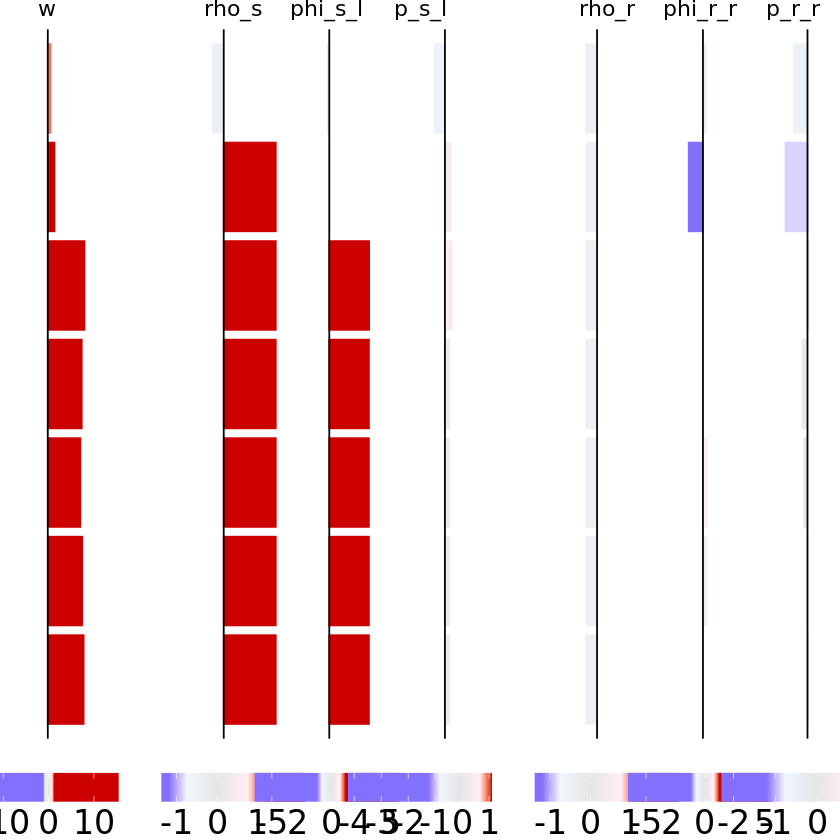

[1] "T"
[1] "1 interactions in this category"


Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_bar()`).”


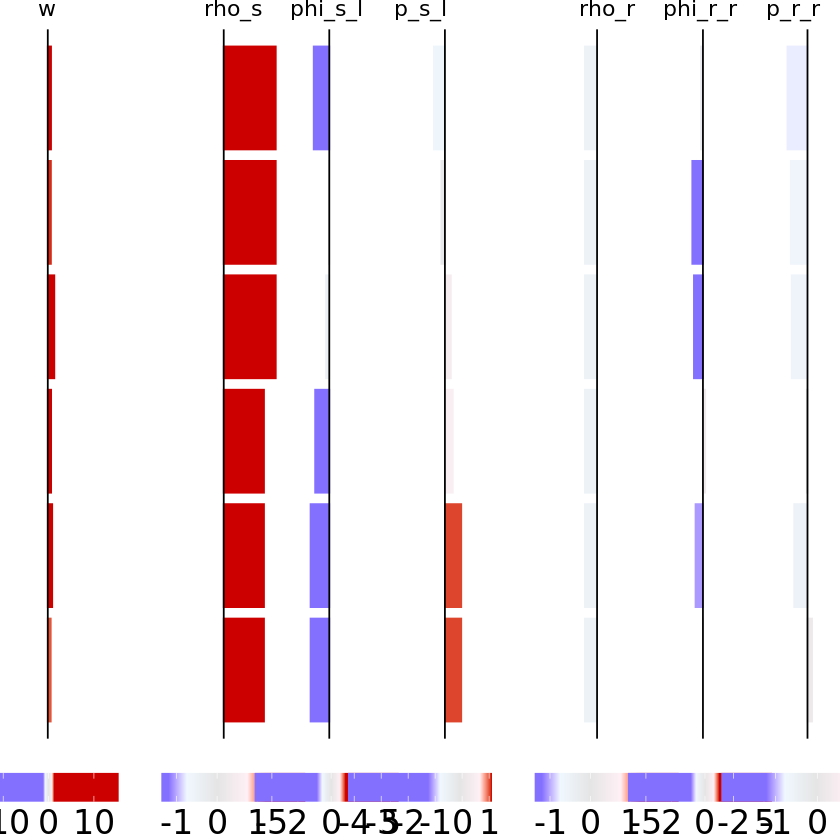

[1] "NK"
[1] "1 interactions in this category"


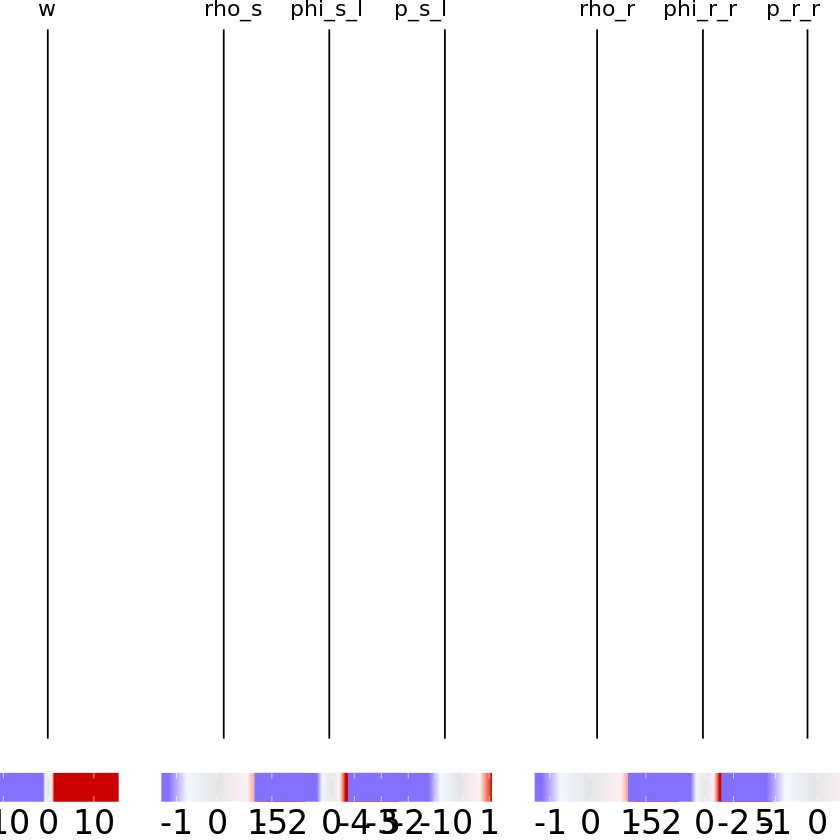

[1] "B"
[1] "2 interactions in this category"


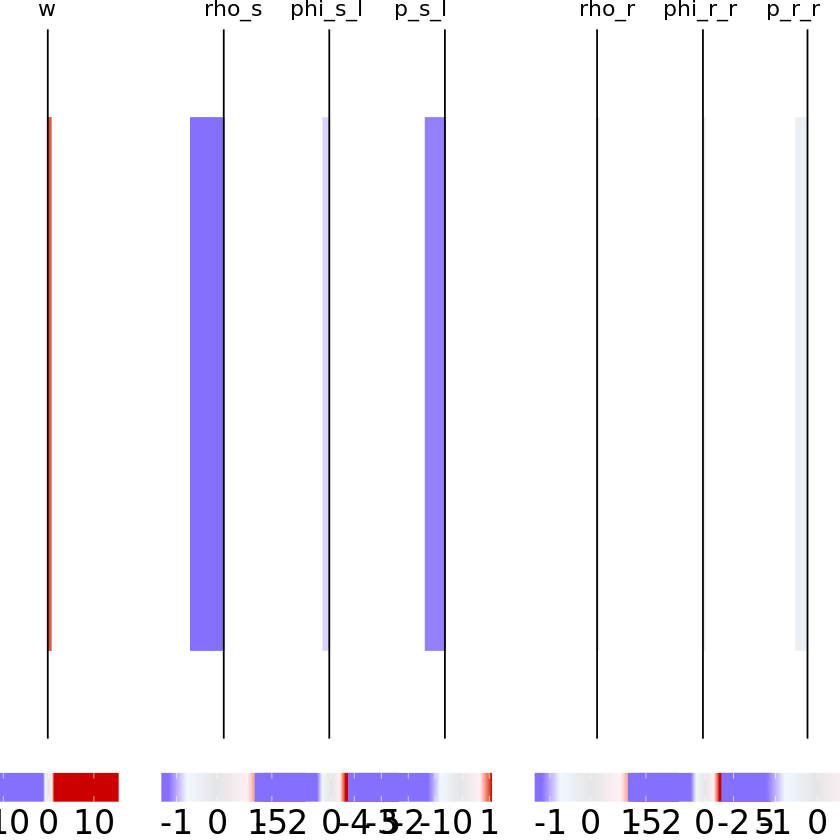

[1] "HSPC"
[1] "82 interactions in this category"


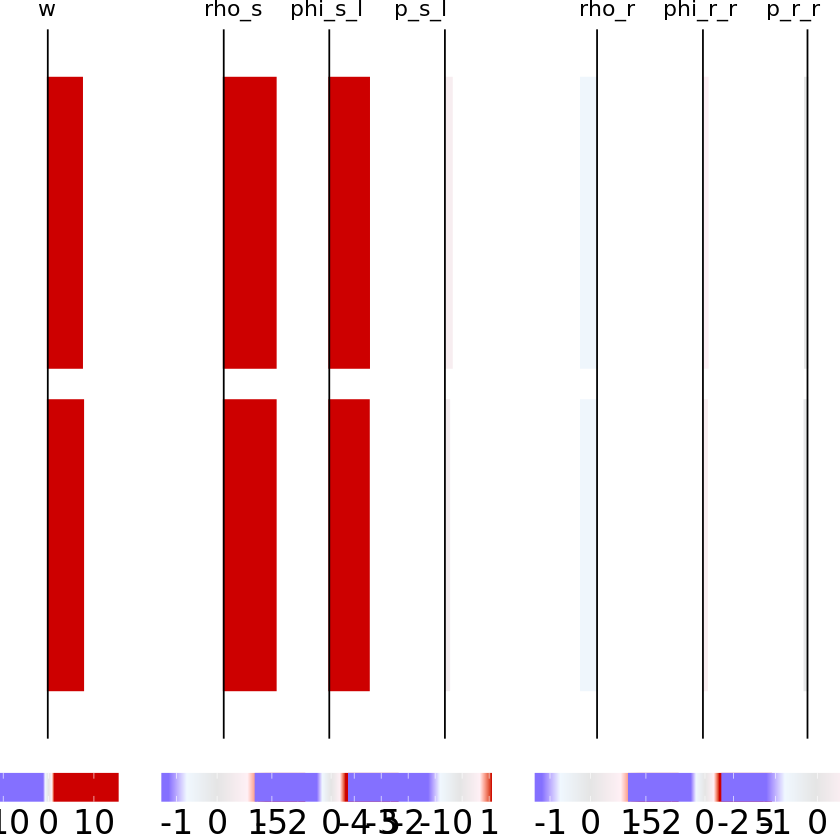

[1] "Ery"
[1] "4 interactions in this category"


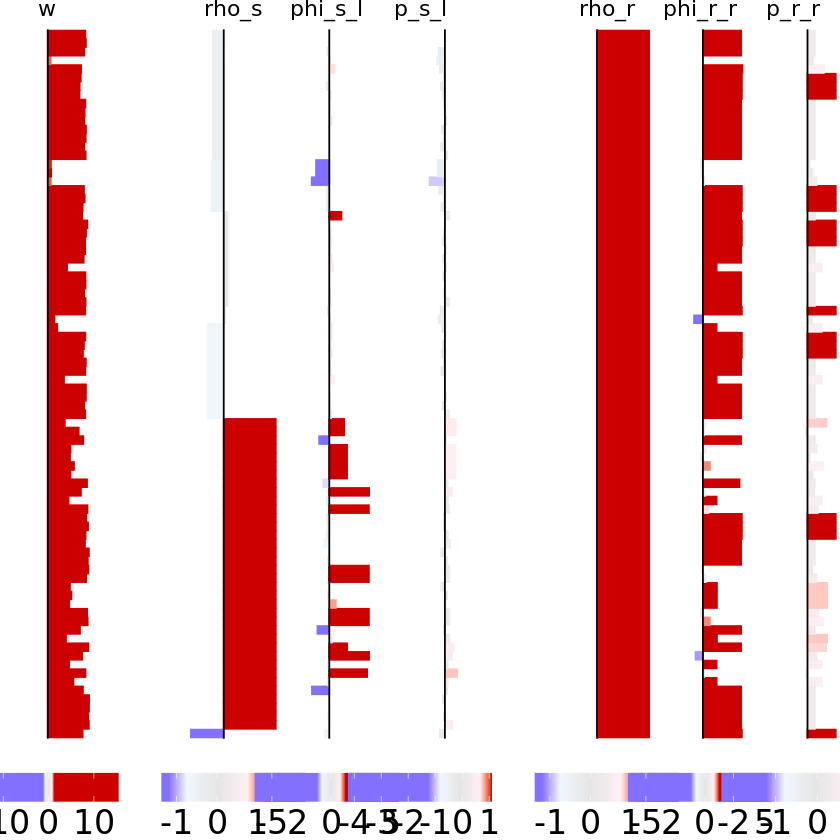

[1] "DC"
[1] "7 interactions in this category"


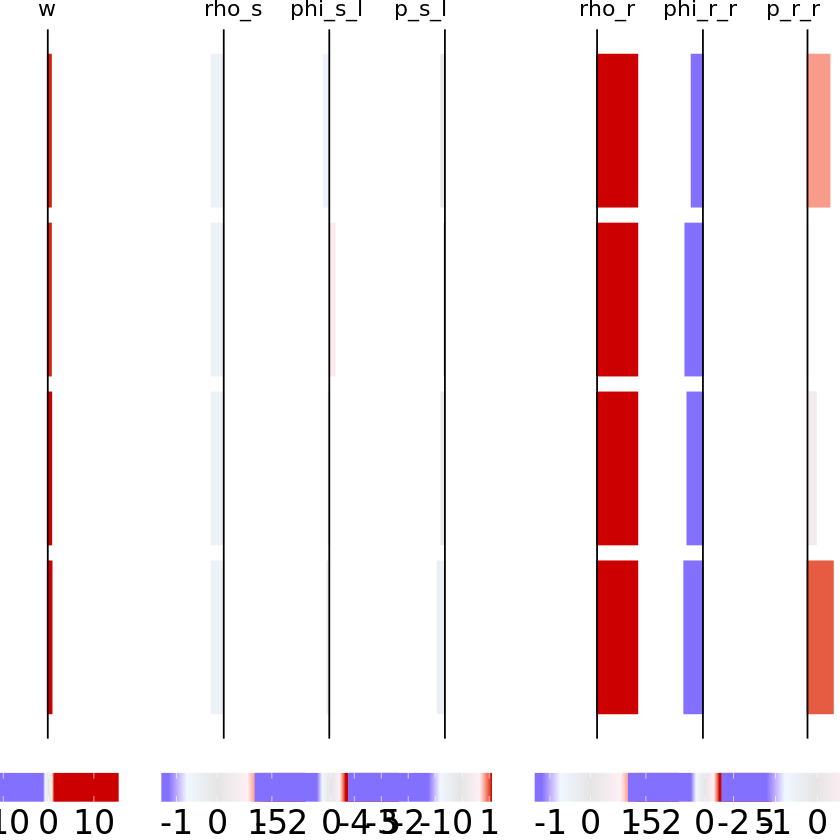

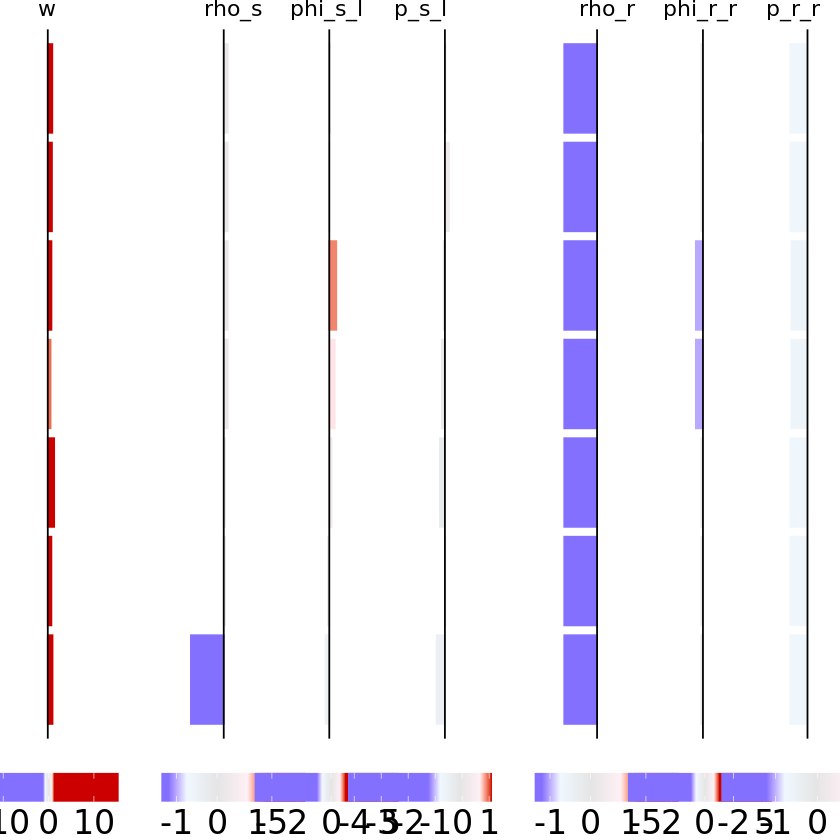

In [21]:
# receiving cell types
for (cell_type in cell_types){
    print(cell_type)
    pattern <- paste0("^[^:]+:[^_]+_", cell_type)
    filtered_IDs <- grep(pattern, IDs_upregulated_sign, value = TRUE)


    forestplot_for_category(filtered_IDs)
    
}

In [22]:
pattern <- paste0("^[^:]+:[^_]+_", "NK")
grep(pattern, IDs_upregulated_sign, value = TRUE)

[1] "DC:DUSP18_NK:ITGB1"

In [23]:
interactions$anno_interactions[interactions$anno_interactions$interaction_ID == "DC:DUSP18_NK:ITGB1",]

,interaction_ID,ligand_gene_name,receptor_gene_name,sending_cell_type,receiving_cell_type,mean_e_s_l_control,mean_e_s_l_case,mean_e_r_r_control,mean_e_r_r_case,log2FC_rho_s,⋯,components_affected_s,components_affected_r,sender_or_receiver_affected,direction_s,direction_r,direction_b,concordance_s,concordance_r,concordance_b,interaction_category
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<ord>,<chr>
140749,DC:DUSP18_NK:ITGB1,DUSP18,ITGB1,DC,NK,0.8967315,0.3552945,2.021557,1.461779,-1.374057,⋯,rho p,none,sender,down,none,down,concordant,undefined,concordant,undefined


[1] "/work/project/ladcol_011/polish/community/docs/showcase_notebooks/Lasry"